My primary goal here is to do analysis on three domains:
- Missing Values
- Outliers
- Errors

In [11]:
# Importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option("display.precision",2)
pd.set_option("display.max_columns",None)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data
data = pd.read_csv('Data/marketing_campaign.csv',sep='\t')

### Missing Values

Lets first check the number of missing values in the dataset

In [4]:
for col in data.columns:
    n_MV = sum(data[col].isna())
    print(f"{col} : {n_MV}")

ID : 0
Year_Birth : 0
Education : 0
Marital_Status : 0
Income : 24
Kidhome : 0
Teenhome : 0
Dt_Customer : 0
Recency : 0
MntWines : 0
MntFruits : 0
MntMeatProducts : 0
MntFishProducts : 0
MntSweetProducts : 0
MntGoldProds : 0
NumDealsPurchases : 0
NumWebPurchases : 0
NumCatalogPurchases : 0
NumStorePurchases : 0
NumWebVisitsMonth : 0
AcceptedCmp3 : 0
AcceptedCmp4 : 0
AcceptedCmp5 : 0
AcceptedCmp1 : 0
AcceptedCmp2 : 0
Complain : 0
Z_CostContact : 0
Z_Revenue : 0
Response : 0


**NOTE:**
- Only Income has missing values which is only 24

For better analysis lets check the samples where Income values are missing

In [6]:
data[data.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


From visual inspection I cant see anything out of ordinary. It seems to me they just opted to not give their Income values!

Now as its only 1% of our total sample size, we can safely remove these samples from our dataset!

#### Removing missing values

In [7]:
data = data.dropna()

In [9]:
data.Income.isnull().sum()

0

In [10]:
data.shape

(2216, 29)

Seems all good now!

### Outliers Analysis

One thing to keep in mind that outlier detection does not make sense for categorical variable. So our focus should be numeical variables! We can use boxplot to detect outliers in the dataset! Lets get started! Mostly we are gonna work on *Univariate Outliers Analysis*!

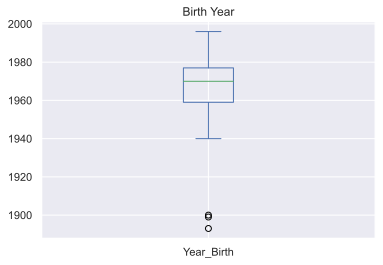

In [13]:
data.Year_Birth.plot.box()
plt.title("Birth Year")
plt.show()

In [21]:
data[data.Year_Birth<1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


There's no way these guys are 100 years old! Better just remove these three!